
### <center>Mushroom Classification</center>
#### <center>Feature Engineering & Model Training</center>
#### <center>Domain - Agriculture</center>
#### <center>Author - syed mansoor</center>
##### Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.

In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [4]:
# load the dataset
data = pd.read_csv("/Mushroom_classification/notebooks\mushroom_data.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [5]:
# create an instance of Label Encoder, One Hot Encode, Standard Scaler
le = LabelEncoder()
one_hot = OneHotEncoder()
ss = StandardScaler()

In [6]:
# split data into independent features and target variable
X = data.drop(['class'], axis=1)
y = data['class']

Now we will use feature selection to find out best features to use for our model. For this purpose we will use SelectKBest method with score_func as chi2

In [7]:
for i in X.columns:
    X[i] = le.fit_transform(X[i])

In [8]:
y = le.fit_transform(y)

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,1,7,1,0,1,0,0,...,3,3,7,7,2,1,4,0,3,4
1,2,3,9,1,0,1,0,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,3,8,1,1,1,0,0,1,0,...,3,3,7,7,2,1,4,1,2,2
3,2,2,8,1,7,1,0,1,1,0,...,3,3,7,7,2,1,4,0,3,4
4,2,3,3,0,6,1,1,0,0,1,...,3,3,7,7,2,1,0,1,0,0


In [10]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
fs = SelectKBest(score_func=chi2, k ='all')

In [12]:
# fitting data
fs.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x0000024C36F91D30>)

Feature 0: 105.377849
Feature 1: 226.305540
Feature 2: 76.156142
Feature 3: 1194.277352
Feature 4: 50.293912
Feature 5: 3.505447
Feature 6: 826.795274
Feature 7: 1636.606833
Feature 8: 1401.345160
Feature 9: 36.594105
Feature 10: 425.896927
Feature 11: 99.829173
Feature 12: 49.206144
Feature 13: 477.500664
Feature 14: 436.232423
Feature 15: 5.126826
Feature 16: 25.646335
Feature 17: 1950.610146
Feature 18: 5713.529406
Feature 19: 311.766736
Feature 20: 8.077202


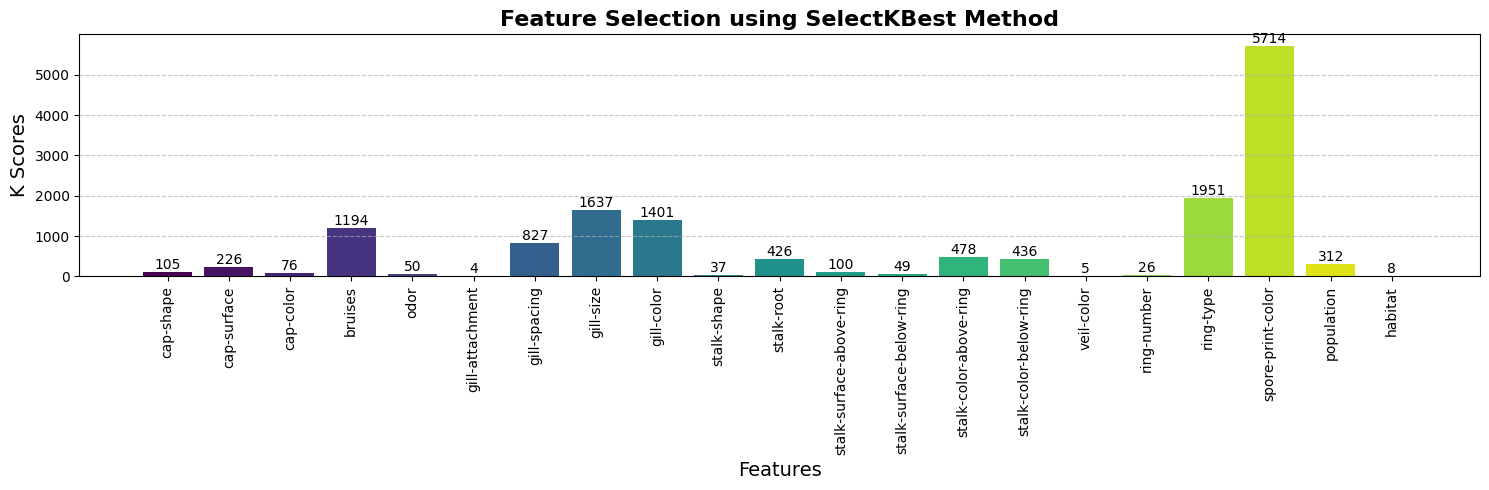

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming fs is your feature selection object
# Print feature scores
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# Plot the scores
plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1, 1), (0, 0))

# Use a color map for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(fs.scores_)))

# Create the bar plot with colors
bars = plt.bar(range(len(fs.scores_)), fs.scores_.round(0), color=colors)

# Set labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('K Scores', fontsize=14)
plt.xticks(ticks=range(len(fs.scores_)), labels=[
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-color', 'ring-number', 
    'ring-type', 'spore-print-color', 'population', 'habitat'
], rotation=90)

# Add labels on the bars
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Feature Selection using SelectKBest Method', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [14]:
new_data = data[['class','bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'ring-type', 'spore-print-color']]
print(new_data.shape)
new_data.head()

(8124, 8)


,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,ring-type,spore-print-color
0,poisonous,yes,close,narrow,black,equal,pendant,black
1,edible,yes,close,broad,black,club,pendant,brown
2,edible,yes,close,broad,brown,club,pendant,brown
3,poisonous,yes,close,narrow,brown,equal,pendant,black
4,edible,no,crowded,broad,black,equal,evanescent,brown


In [15]:
new_data.to_csv("final_data.csv", index=False, header=True)

In [17]:
# split data into independent features and target variable
X = new_data.drop(['class'], axis=1)
y = new_data['class']

In [18]:
# categorical features
cat_features = X.select_dtypes(include="object").columns

In [19]:
cat_features

Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'ring-type', 'spore-print-color'],
      dtype='object')

In [20]:
# create pipelines for categorical data
cat_pipeline = Pipeline(
    steps=[
        ("one hot", OneHotEncoder()),
        ("Scaler", StandardScaler(with_mean=False))
    ]
)

In [21]:
# creating preprocessor object
preprocessor = ColumnTransformer([
    ("cat_pipeline", cat_pipeline, cat_features)
])

In [22]:
# applying preprocesing object to features
X = preprocessor.fit_transform(X)

In [23]:
# Label encode target variable
y = le.fit_transform(y)

In [24]:
# divide the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=222)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (6093, 37)
y_train: (6093,)
X_test: (2031, 37)
y_test: (2031,)


### Model Training:

In [25]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)    
    classificationreport = classification_report(true, predicted)
    return accuracy, confusionmatrix, classificationreport

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Support Vector Classifier': SVC(),
    # 'Gaussian Naive Bayes': GaussianNB(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=False),
    'XGBoost Classifier': XGBClassifier()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy, train_confusionmatrix, train_classificationreport = evaluate_model(y_train,y_train_pred)

    test_accuracy, test_confusionmatrix, test_classificationreport = evaluate_model(y_test, y_test_pred)
        
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("**Accuracy Score:", train_accuracy)
    print("**Confusion Matrix: \n", train_confusionmatrix)
    print("**Classification Report: \n", train_classificationreport)

    print('-'*35)
    
    print('Model performance for Test set')
    print("**Accuracy Score:", test_accuracy)
    print("**Confusion Matrix: \n", test_confusionmatrix)
    print("**Classification Report: \n", test_classificationreport)
    
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
**Accuracy Score: 0.9806335138683735
**Confusion Matrix: 
 [[3079   76]
 [  42 2896]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3155
           1       0.97      0.99      0.98      2938

    accuracy                           0.98      6093
   macro avg       0.98      0.98      0.98      6093
weighted avg       0.98      0.98      0.98      6093

-----------------------------------
Model performance for Test set
**Accuracy Score: 0.9812900049236829
**Confusion Matrix: 
 [[1033   20]
 [  18  960]]
**Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1053
           1       0.98      0.98      0.98       978

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

d:\Mushroom_classification\.mushroom\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Mushroom_classification\.mushroom\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\Mushroom_classification\.mushroom\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Mushroom_classification\.mushroom\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Mushroom_classification\.mushroom\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

K-Neighbors Classifier
Model performance for Training set
**Accuracy Score: 1.0
**Confusion Matrix: 
 [[3155    0]
 [   0 2938]]
**Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3155
           1       1.00      1.00      1.00      2938

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

-----------------------------------
Model performance for Test set
**Accuracy Score: 1.0
**Confusion Matrix: 
 [[1053    0]
 [   0  978]]
**Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



CatBoost Classifier
Mod

In [28]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)),columns=['Model Name','Accuracy Score']).sort_values(
    by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
1,Decision Tree Classifier,1.000000
2,Random Forest Classifier,1.000000
3,Gradient Boosting Classifier,1.000000
5,Support Vector Classifier,1.000000
6,K-Neighbors Classifier,1.000000
7,CatBoost Classifier,1.000000
8,XGBoost Classifier,1.000000
4,AdaBoost Classifier,0.984244
0,Logistic Regression,0.981290


In [29]:
# we wil use XGBoost Classifier
model_xgboost = XGBClassifier()

In [30]:
# fit training data
model_xgboost.fit(X_train, y_train)
model_xgboost.score(X_train, y_train)

1.0

In [31]:
# make predictions on test data
predictions = model_xgboost.predict(X_test)

In [32]:
# performance metrics
print("Accuracy Score:", accuracy_score(y_test, predictions).round(4)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy Score: 100.0
Confusion Matrix:
 [[1053    0]
 [   0  978]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [33]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':predictions})
pred_df

,Actual Value,Predicted Value
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2026,1,1
2027,1,1
2028,0,0
2029,0,0


<Figure size 800x600 with 0 Axes>

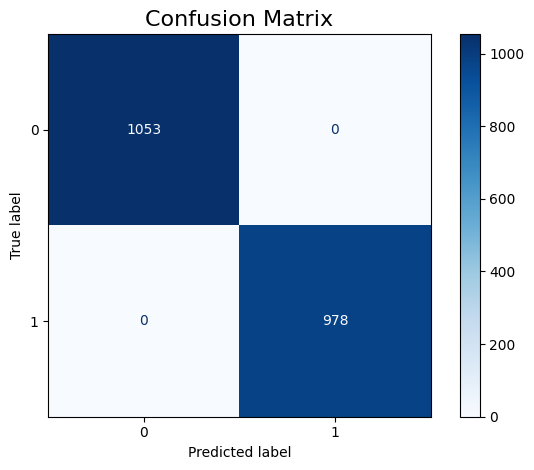

In [36]:

from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size
ConfusionMatrixDisplay.from_estimator(
    model_xgboost,         # Your trained model
    X_test,            # Test features
    y_test,            # True labels
    cmap='Blues',      # Color map for better visual distinction
    display_labels=model_xgboost.classes_  # Use class labels from the model
)

# Add title
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()